# *Exploracion de DATOS para INFORME*
# *Data Exploration to REPORT*

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
datos = pd.read_csv("../data/raw/dataset.csv")
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
datos.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
datos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
for column in datos.columns:
    print(f"Columna: *{column}* tiene tipo *{datos[column].dtype}* y los siguientes valores unicos: {datos[column].unique()[0:10]} ")

Columna: *age* tiene tipo *int64* y los siguientes valores unicos: [19 18 28 33 32 31 46 37 60 25] 
Columna: *sex* tiene tipo *object* y los siguientes valores unicos: ['female' 'male'] 
Columna: *bmi* tiene tipo *float64* y los siguientes valores unicos: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84 ] 
Columna: *children* tiene tipo *int64* y los siguientes valores unicos: [0 1 3 2 5 4] 
Columna: *smoker* tiene tipo *object* y los siguientes valores unicos: ['yes' 'no'] 
Columna: *region* tiene tipo *object* y los siguientes valores unicos: ['southwest' 'southeast' 'northwest' 'northeast'] 
Columna: *charges* tiene tipo *float64* y los siguientes valores unicos: [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692] 


In [6]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 6): # Se podria poner otro umbral, como la mitad del maximo.
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.2f}, valor maximo: {datos[column].max():.2f} y valor minimo: {datos[column].min():.2f}")



Columna 'age' tiene media: 39.21, valor maximo: 64.00 y valor minimo: 18.00

Columna 'sex' (candidata categórica): 2 valores únicos
   Hay 49.48% codificado en female
   Hay 50.52% codificado en male

Columna 'bmi' tiene media: 30.66, valor maximo: 53.13 y valor minimo: 15.96

Columna 'children' (candidata categórica): 6 valores únicos
   Hay 42.90% codificado en 0
   Hay 24.22% codificado en 1
   Hay 11.73% codificado en 3
   Hay 17.94% codificado en 2
   Hay 1.35% codificado en 5
   Hay 1.87% codificado en 4

Columna 'smoker' (candidata categórica): 2 valores únicos
   Hay 20.48% codificado en yes
   Hay 79.52% codificado en no

Columna 'region' (candidata categórica): 4 valores únicos
   Hay 24.29% codificado en southwest
   Hay 27.20% codificado en southeast
   Hay 24.29% codificado en northwest
   Hay 24.22% codificado en northeast

Columna 'charges' tiene media: 13270.42, valor maximo: 63770.43 y valor minimo: 1121.87


In [7]:
datos_codificidaos = datos.copy()
for column in datos.columns:
    if len(datos[column].unique()) <= 6 and datos[column].dtype == 'object':
        unicos = datos[column].unique()
        for i in range(len(unicos)):
            datos_codificidaos[column] = datos_codificidaos[column].replace({unicos[i]: i})
        print(column, datos_codificidaos[column].unique())

sex [0 1]
smoker [0 1]
region [0 1 2 3]


C:\Users\User\AppData\Local\Temp\ipykernel_21916\1728734162.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_codificidaos[column] = datos_codificidaos[column].replace({unicos[i]: i})


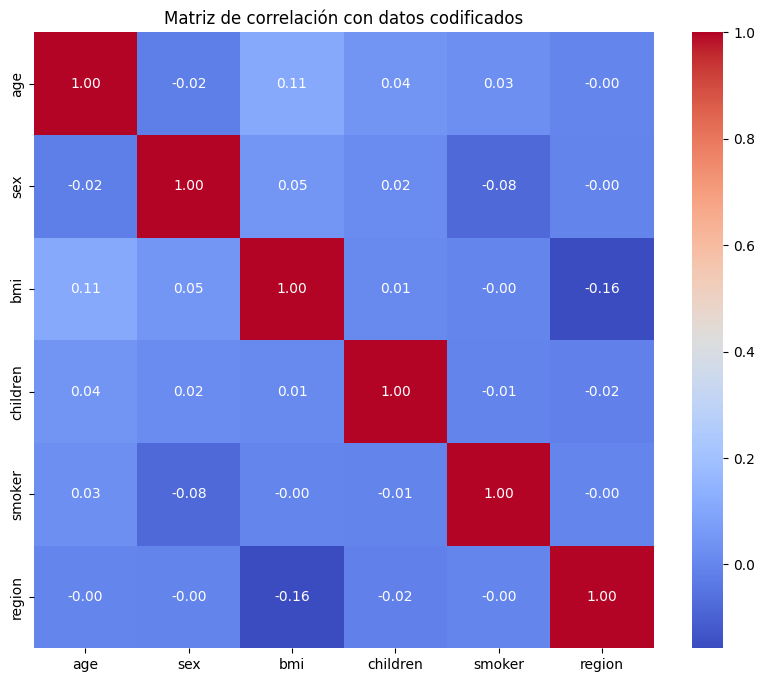

In [8]:
atributos = [col for col in datos_codificidaos.columns if col != "charges"]

correlation_matrix = datos_codificidaos[atributos].corr()  # corr() usa Pearson por defecto

# Opcional: heatmap más visual
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación con datos codificados")
plt.show()

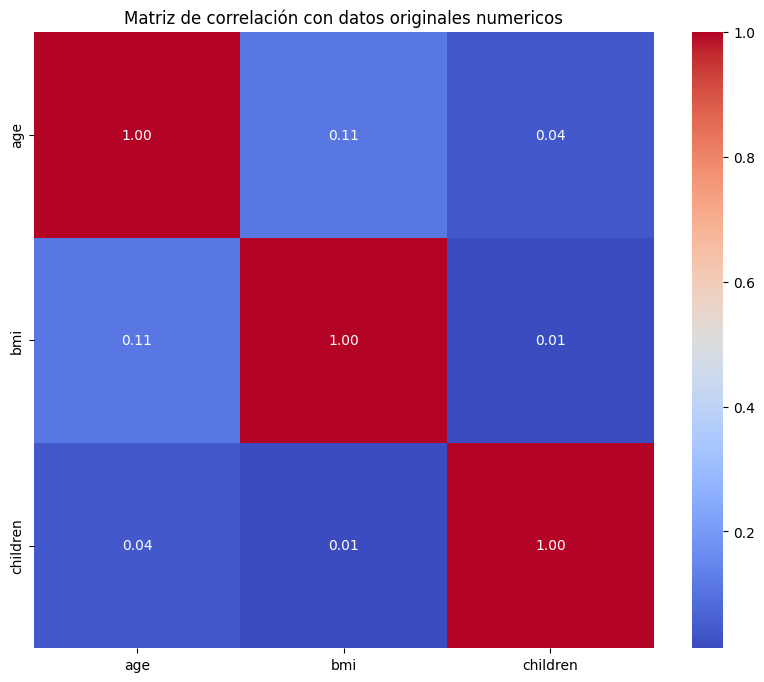

In [9]:
atributos = [col for col in datos.columns if col != "charges" and datos[col].dtype != 'object']

correlation_matrix = datos[atributos].corr()  # corr() usa Pearson por defecto

# Opcional: heatmap más visual
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación con datos originales numericos")
plt.show()